In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.linalg import lstsq

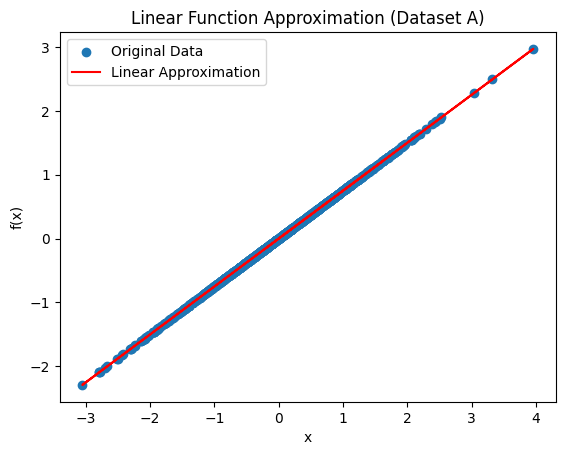

In [6]:
# Load dataset (A) with space-separated values
data_a = np.loadtxt('../data/linear_function_data.txt')
x_a = data_a[:, 0]
f_a = data_a[:, 1]

# Construct the design matrix X
X_a = np.column_stack([np.ones_like(x_a), x_a])

# Perform least-squares minimization to obtain matrix A
A_a, residuals, rank, s = lstsq(X_a, f_a, cond=None)

# Predict the values using the linear model
f_hat_a = X_a @ A_a

# Plot the original data and the linear approximation
plt.scatter(x_a, f_a, label='Original Data')
plt.plot(x_a, f_hat_a, color='red', label='Linear Approximation')
plt.title('Linear Function Approximation (Dataset A)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


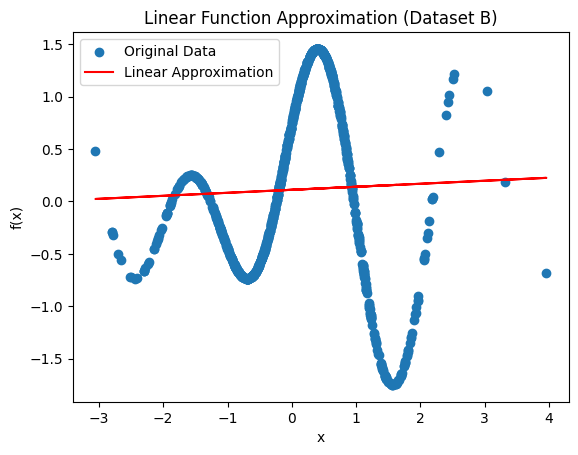

In [7]:
# Load dataset (B) with space-separated values
data_b = np.loadtxt('../data/nonlinear_function_data.txt')
x_b = data_b[:, 0]
f_b = data_b[:, 1]

# Construct the design matrix X
X_b = np.column_stack([np.ones_like(x_b), x_b])

# Perform least-squares minimization to obtain matrix A
A_b, residuals, rank, s = lstsq(X_b, f_b, cond=None)

# Predict the values using the linear model
f_hat_b = X_b @ A_b

# Plot the original data and the linear approximation
plt.scatter(x_b, f_b, label='Original Data')
plt.plot(x_b, f_hat_b, color='red', label='Linear Approximation')
plt.title('Linear Function Approximation (Dataset B)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


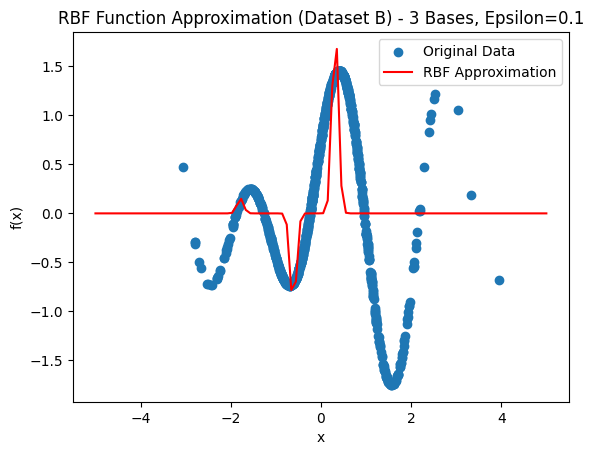

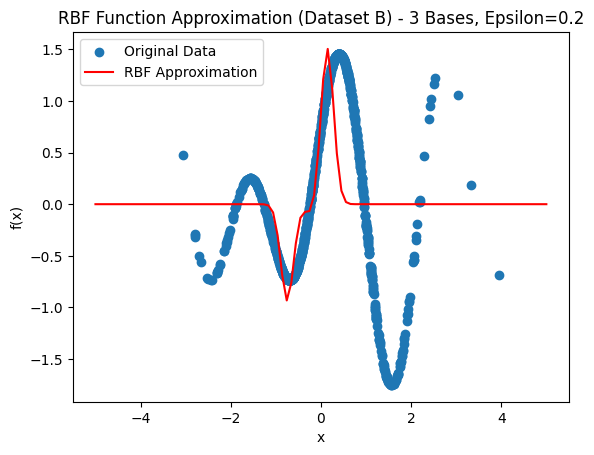

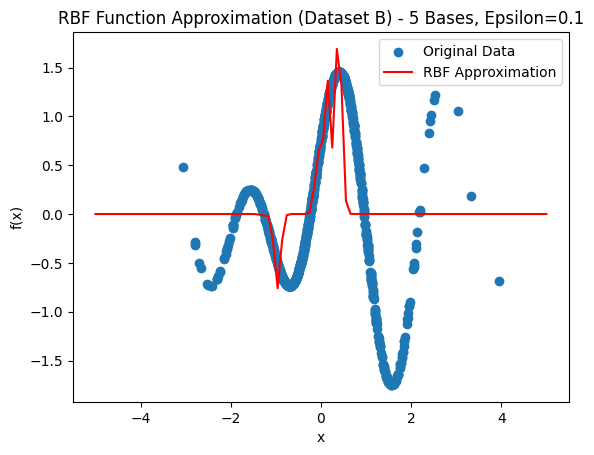

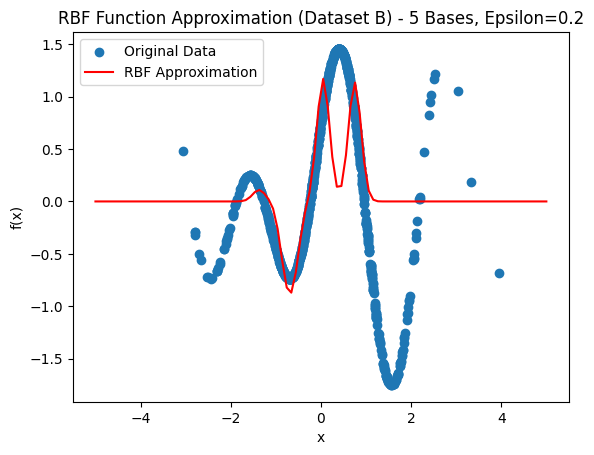

In [1]:
# Load dataset (B) with space-separated values
data_c = pd.read_csv('../data/nonlinear_function_data.txt', sep=" ", header=None, dtype=np.float64)
data_c = np.expand_dims(data_c.iloc[:, 0], 1), data_c.iloc[:, 1]

# Define the number of bases and epsilon values
n_bases_list = (3, 5, 8, 10)
eps_list = (.1, .2, .5, .8, 12)

# Iterate over different combinations of bases and epsilon
for n_bases in n_bases_list:
    for eps in eps_list:
        # Randomly choose n_bases centers
        centers = data_c[0][np.random.choice(range(data_c[0].shape[0]), replace=False, size=n_bases)]

        # Compute radial basis functions
        phi = np.exp(-cdist(data_c[0], centers) ** 2 / eps ** 2)

        # Perform least-squares minimization to obtain coefficients matrix C
        C, residuals, rank, singvals = np.linalg.lstsq(a=phi, b=data_c[1], rcond=1e-5)

        # Predict the values using the RBF model
        pred = f_hat_c = np.sum(C * phi, axis=1)
        
        # Calculate Mean Squared Error
        mse = np.linalg.norm(pred - data_c[1])**2 / len(data_c[1])

        # Generate data points for plotting the RBF approximation
        x_plot = np.linspace(start=-5, stop=5, num=100)
        phi_plot = np.exp(-cdist(np.expand_dims(x_plot, 1), centers) ** 2 / eps ** 2)
        f_hat_c_plot = np.sum(C * phi_plot, axis=1)

        # Plot the original data and the RBF approximation
        plt.scatter(data_c[0], data_c[1], label='Original Data')
        plt.plot(x_plot, f_hat_c_plot, color='red', label='RBF Approximation')
        plt.title(f'RBF Function Approximation (Dataset B) - {n_bases} Bases, Epsilon={eps}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.show()
